## Distance Calculation by latitude, longitude

In [4]:
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print (geopy.distance.geodesic(coords_1, coords_2).km)

279.35290160430094


In [8]:
from geopy.distance import geodesic


origin = (30.172705, 31.526725)  # (latitude, longitude) 
dist = (30.288281, 31.732326)

print(str(geodesic(origin, dist).meters) + " Meters" )
print(geodesic(origin, dist).kilometers)  
print(geodesic(origin, dist).miles)  

23576.805481751613 Meters
23.576805481751613
14.64994773134371


## **GPXPY** 

Gpx is an XML-schema designed as a common GPS data format for software applications. It can be used to describe waypoints, tracks, and routes

In [1]:
import gpxpy
import matplotlib.pyplot as plt
import datetime
from geopy import distance
from math import sqrt, floor
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go
import haversine

In [6]:
gpx_file = open('Run_Data.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

In [7]:
len(gpx.tracks)
len(gpx.tracks[0].segments)
len(gpx.tracks[0].segments[0].points)

2426

In [8]:
data = gpx.tracks[0].segments[0].points

In [9]:
## Start Position
start = data[0]
## End Position
finish = data[-1]

In [10]:
df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time'])
for point in data:
    df = df.append({'lon': point.longitude, 'lat' : point.latitude, 'alt' : point.elevation, 'time' : point.time}, ignore_index=True)

In [11]:
df.head()

,lon,lat,alt,time
0,100.491491,13.725929,9.8,2018-07-24 07:32:31+00:00
1,100.491541,13.725939,10.5,2018-07-24 07:32:33+00:00
2,100.491575,13.725943,10.7,2018-07-24 07:32:35+00:00
3,100.491629,13.725970,10.8,2018-07-24 07:32:37+00:00
4,100.491667,13.725987,11.1,2018-07-24 07:32:38+00:00


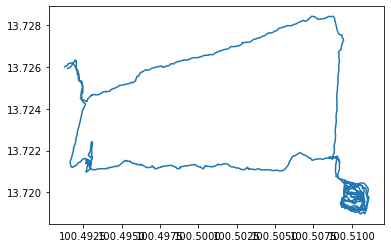

In [12]:
plt.plot(df['lon'], df['lat'])

In [16]:
df[df['time']=='2018-07-24 07:32:31+00:00']

,lon,lat,alt,time


## World Citys - Belgium

In [18]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_CityInfo = pd.read_csv("worldcities.csv")
print(df_CityInfo.head())

          city   city_ascii      lat       lng        country iso2 iso3  \
0        Tokyo        Tokyo  35.6850  139.7514          Japan   JP  JPN   
1     New York     New York  40.6943  -73.9249  United States   US  USA   
2  Mexico City  Mexico City  19.4424  -99.1310         Mexico   MX  MEX   
3       Mumbai       Mumbai  19.0170   72.8570          India   IN  IND   
4    São Paulo    Sao Paulo -23.5587  -46.6250         Brazil   BR  BRA   

         admin_name  capital  population          id  
0             Tōkyō  primary  35676000.0  1392685764  
1          New York      NaN  19354922.0  1840034016  
2  Ciudad de México  primary  19028000.0  1484247881  
3       Mahārāshtra    admin  18978000.0  1356226629  
4         São Paulo    admin  18845000.0  1076532519  


In [19]:
df_CityInfo[df_CityInfo['country']=='Belgium']

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
245,Brussels,Brussels,50.8333,4.3333,Belgium,BE,BEL,Brussels-Capital Region,primary,1743000.0,1056469830
657,Antwerp,Antwerp,51.2204,4.4150,Belgium,BE,BEL,Flanders,minor,920000.0,1056168623
804,Liège,Liege,50.6300,5.5800,Belgium,BE,BEL,Wallonia,minor,749110.0,1056513284
1150,Gent,Gent,51.0300,3.7000,Belgium,BE,BEL,Flanders,minor,444336.0,1056062897
1390,Charleroi,Charleroi,50.4204,4.4500,Belgium,BE,BEL,Wallonia,minor,345367.0,1056263311
2627,Bruges,Bruges,51.2204,3.2300,Belgium,BE,BEL,Flanders,minor,146469.0,1056953902
3151,Namur,Namur,50.4704,4.8700,Belgium,BE,BEL,Wallonia,admin,106284.0,1056954156
7123,Mons,Mons,50.4460,3.9390,Belgium,BE,BEL,Wallonia,minor,91277.0,1056836704
7437,Hasselt,Hasselt,50.9640,5.4840,Belgium,BE,BEL,Flanders,minor,69222.0,1056617022
9147,Arlon,Arlon,49.6833,5.8167,Belgium,BE,BEL,Wallonia,minor,26179.0,1056746428
